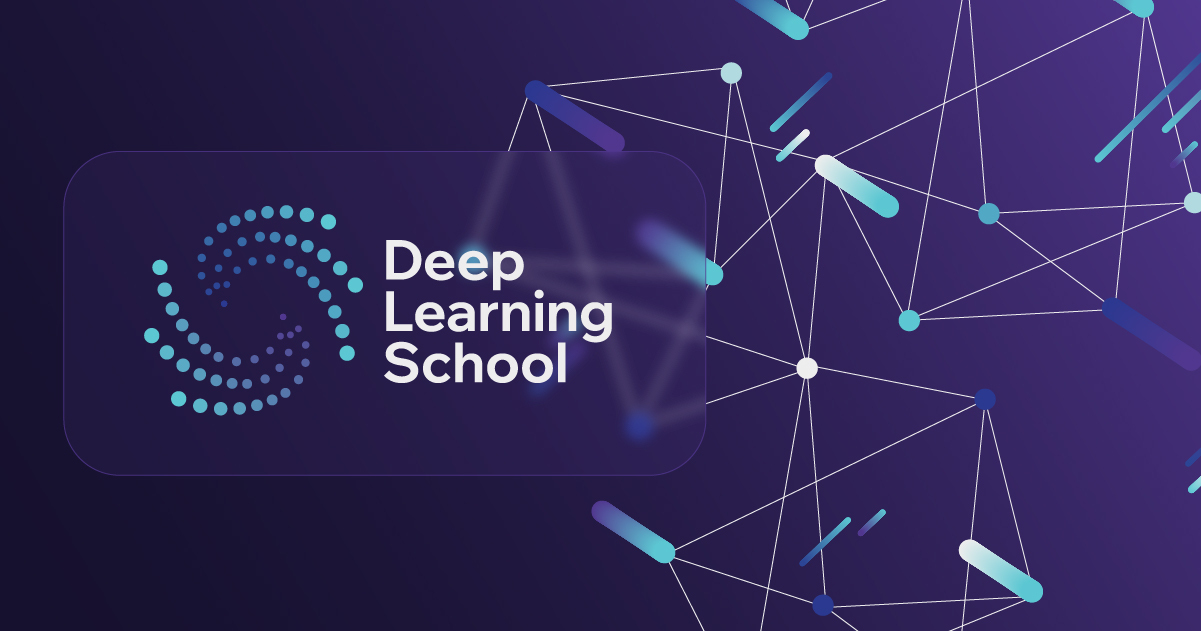

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Семинар. Предобработка текста.</b></h1>


## Часть 1

### Токенизация

In [1]:
# @title Default title text
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [3]:
print(sent_tokenize("I was going home when she rung. It was a surprise. My bag cost 5.78. It is so cool"))

['I was going home when she rung.', 'It was a surprise.', 'My bag cost 5.78.', 'It is so cool']


[<img src="https://raw.githubusercontent.com/natasha/natasha-logos/master/natasha.svg">](https://github.com/natasha/natasha)

[Razdel](https://natasha.github.io/razdel/)

In [4]:
!pip install -q razdel

In [5]:
from razdel import tokenize, sentenize
text = 'Кружка-термос на 0.5л (50/64 см³, 516;...)'
list(tokenize(text))

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

#### Регулярные выражения

Исчерпывающий пост https://habr.com/ru/post/349860/

In [6]:
# последовательность из 5 цифр
import re
word = 'sufdigu346926435njsldfo3294023bjakdb123'
re.findall(r'\d{5}', word)

['34692', '32940']

In [7]:
# Формат день/месяц/год
word = '08/09/2004fhduks08'
re.findall(r'\d{2}/\d{2}/\d{4}', word)

['08/09/2004']

In [8]:
word = '9hfhf9'
re.findall(r'\b\w{4}\b', word)

[]

In [9]:
word = '+7918191'
re.findall(r'[-+]?\d+', word)

['+7918191']

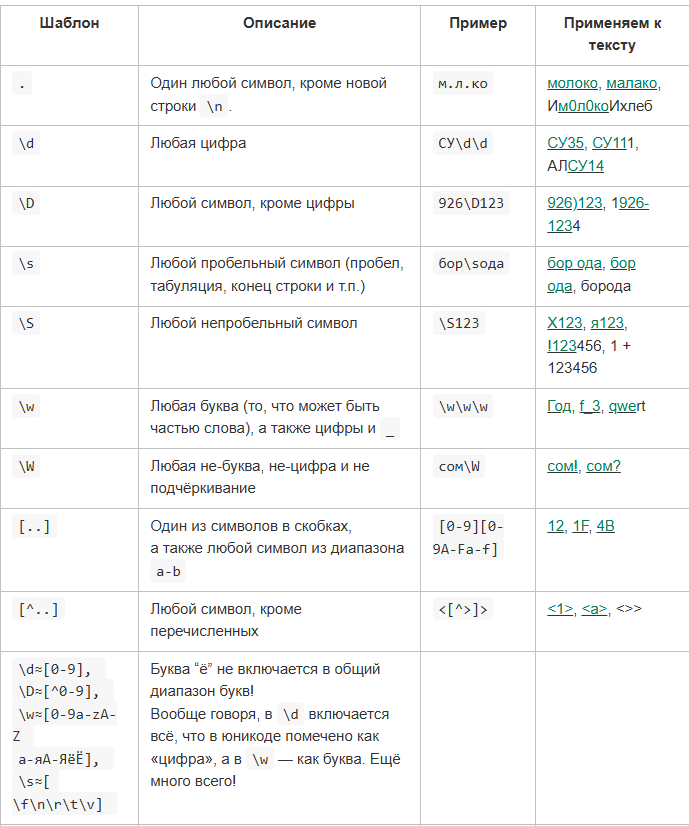

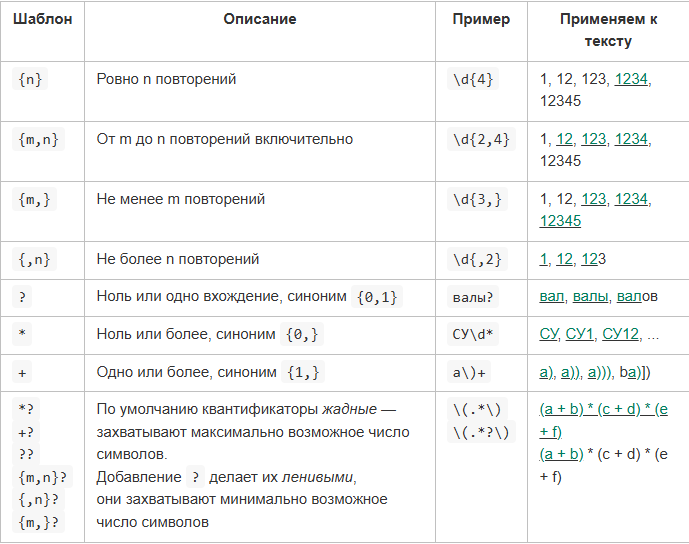

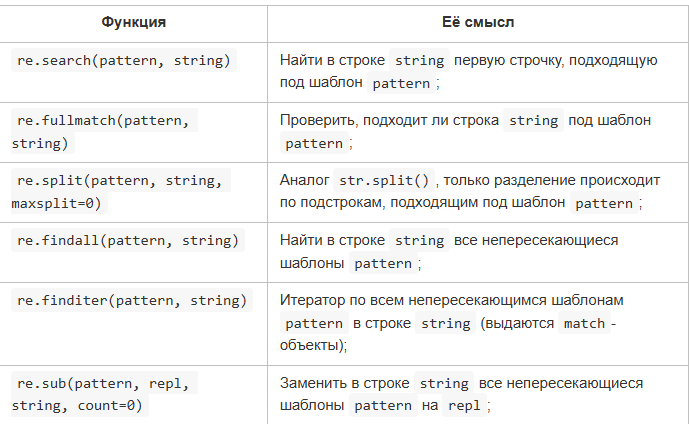

In [10]:
import re
word = 'supercalifragilisticexpialidocious'
re.findall('[abc]|up|super', word)

['super', 'c', 'a', 'a', 'c', 'a', 'c']

In [11]:
re.findall(r'\d{1,3}', 'These are some numbers: 49 and 4323121')

['49', '432', '312', '1']

In [12]:
re.sub(r'[,\.?!]','','How, to? split. text!')

'How to split text'

In [13]:
re.sub(r'[^A-z]',' ','I 123 can 45 play 67 football').split()

['I', 'can', 'play', 'football']

### Удаление неинформативных слов

#### N-граммы

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [14]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('all',), ('work',), ('and',), ('no',), ('play',)]
[('all', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')]


In [15]:
from nltk import FreqDist
print('Популярные униграммы: ', FreqDist(unigram).most_common(5))
print('Популярные биграммы: ', FreqDist(bigram).most_common(5))

Популярные униграммы:  [(('all',), 2), (('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2)]
Популярные биграммы:  [(('all', 'work'), 2), (('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('play', 'makes'), 1)]


#### Стоп-слова

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'the', "he'll", 'hers', "isn't", "i've", 'their', 'your', 'about', 't', 'his', "they'll", "we've", 'weren', 'through', "wouldn't", 'out', "you've", 'whom', 'an', 'y', 'before', 'both', 'hadn', 'him', 'being', 'from', 'haven', 'should', "wasn't", "doesn't", 'over', "aren't", "hadn't", 'above', "shan't", 'here', 'll', 'which', 'how', "that'll", 'my', 'that', 'these', 'and', 'didn', 'if', "she's", "didn't", 'do', 'have', 'hasn', "weren't", 'where', 'mightn', 'own', 've', 'against', 'had', 'for', 'were', 'o', 'we', 'i', 'does', 'they', 'again', 'shan', 'to', "i'll", 'themselves', 'off', "hasn't", "she'll", 'up', 'don', 'too', 'further', 'shouldn', 'only', 'so', 'just', 'on', "they're", 'under', 'of', 'what', 'than', 'd', "i'd", 'it', 'can', 'herself', 'couldn', 'down', 'each', 'isn', 'who', 'in', 'doesn', 'has', 'yours', 'was', 'once', "it'll", 'other', "he's", 'such', 'having', 'm', 'after', "they'd", "couldn't", 'ain', 'but', 'ma', 'are', 'during', "haven't", 'her', 'a', 'yourselves', '

In [18]:
print([word for word in tokens if word not in stopWords])

['work', 'play', 'makes', 'jack', 'dull', 'boy', ',', 'work', 'play']


In [19]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Стемминг vs Лемматизация
* ‘Caring’ -> Лемматизация -> ‘Care’
* ‘Caring’ -> Стемминг -> ‘Car’

### Стемминг
* процесс нахождения основы слова для заданного исходного слова

In [20]:
from nltk.stem import PorterStemmer, SnowballStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала']

In [21]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [22]:
ss = SnowballStemmer(language='russian')
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа']

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме

In [23]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

raw_ru = """Не существует научных доказательств в пользу эффективности НЛП, оно
признано псевдонаукой. Систематические обзоры указывают, что НЛП основано на
устаревших представлениях об устройстве мозга, несовместимо с современной
неврологией и содержит ряд фактических ошибок."""

In [24]:
!pip install -q pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 62.5 MB/s eta 0:00:00


In [25]:
# 1
import pymorphy3
# Создаем экземпляр анализатора
morph = pymorphy3.MorphAnalyzer()
pymorphy_results = list(map(lambda x: morph.parse(x), raw_ru.split(' ')))
print(' '.join([res[0].normal_form for res in pymorphy_results]))

не существовать научный доказательство в польза эффективность нлп, оно
признать псевдонаукой. систематический обзор указывают, что нлп основать на
устаревший представление о устройство мозга, несовместимый с современной
неврология и содержать ряд фактический ошибок.


In [26]:
# 2
import spacy
nlp = spacy.load('en_core_web_sm')
spacy_results = nlp(raw)
print(' '.join([token.lemma_ for token in spacy_results]))

DENNIS : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


[Сравнение PyMorphy2 и PyMystem3](https://habr.com/ru/post/503420/)

### Part-of-Speech

In [27]:
# 1
[(res[0].normal_form, res[0].tag) for res in pymorphy_results[:9]]

[('не', OpencorporaTag('PRCL')),
 ('существовать', OpencorporaTag('VERB,impf,intr sing,3per,pres,indc')),
 ('научный', OpencorporaTag('ADJF,Qual plur,gent')),
 ('доказательство', OpencorporaTag('NOUN,inan,neut plur,gent')),
 ('в', OpencorporaTag('PREP')),
 ('польза', OpencorporaTag('NOUN,inan,femn sing,accs')),
 ('эффективность', OpencorporaTag('NOUN,inan,femn sing,gent')),
 ('нлп,', OpencorporaTag('UNKN')),
 ('оно\nпризнать', OpencorporaTag('PRTS,perf,past,pssv neut,sing'))]

In [28]:
# 2
[(token.lemma_, token.pos_) for token in spacy_results[:7]]

[('DENNIS', 'PROPN'),
 (':', 'PUNCT'),
 ('listen', 'VERB'),
 (',', 'PUNCT'),
 ('strange', 'ADJ'),
 ('woman', 'NOUN'),
 ('lie', 'VERB')]

### Named entities recognition

In [29]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


## Часть 2

### Задача классификации

#### 20 newsgroups
Датасет с 18000 новостей, сгруппированных по 20 темам.

In [30]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [31]:
# Просто 20 категорий
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [32]:
newsgroups_train.filenames.shape

(11314,)

#### Рассмотрим подвыборку

In [33]:
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)
newsgroups_train.filenames.shape

(2034,)

In [34]:
print(newsgroups_train.data[0])

From: rych@festival.ed.ac.uk (R Hawkes)
Subject: 3DS: Where did all the texture rules go?
Lines: 21

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Rycharde Hawkes				email: rych@festival.ed.ac.uk
Virtual Environment Laboratory
Dept. of Psychology			Tel  : +44 31 650 3426
Univ. of Edinburgh			Fax  : +44 31 667 0150



In [35]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

#### TF-IDF(напоминание)

$n_{\mathbb{d}\mathbb{w}}$ - число вхождений слова $\mathbb{w}$ в документ $\mathbb{d}$;<br>
$N_{\mathbb{w}}$ - число документов, содержащих $\mathbb{w}$;<br>
$N$ - число документов; <br><br>

$p(\mathbb{w}, \mathbb{d}) = N_{\mathbb{w}} / N$ - вероятность наличия слова $\mathbb{w}$ в любом документе $\mathbb{d}$
<br>
$P(\mathbb{w}, \mathbb{d}, n_{\mathbb{d}\mathbb{w}}) = (N_{\mathbb{w}} / N)^{n_{\mathbb{d}\mathbb{w}}}$ - вероятность встретить $n_{\mathbb{d}\mathbb{w}}$ раз слово $\mathbb{w}$ в документе $\mathbb{d}$<br><br>

$-\log{P(\mathbb{w}, \mathbb{d}, n_{\mathbb{d}\mathbb{w}})} = n_{\mathbb{d}\mathbb{w}} \cdot \log{(N / N_{\mathbb{w}})} = TF(\mathbb{w}, \mathbb{d}) \cdot IDF(\mathbb{w})$<br><br>

$TF(\mathbb{w}, \mathbb{d}) = n_{\mathbb{d}\mathbb{w}}$ - term frequency;<br>
$IDF(\mathbb{w}) = \log{(N /N_{\mathbb{w}})}$ - inverted document frequency;

Он возьмет все слова из всех документов и составит из них огромный словарь.

Для каждого документа он посчитает важность каждого слова из словаря в этом документе. Важность (TF-IDF) высокая, если слово часто встречается в этом документе, но редко в остальных. Например, слово "космос" будет важным для документа о космосе, но не будет важным для общего слова "привет". Текст, выделенный полужирным шрифтом

#### Давайте векторизуем эти тексты с помощью TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Некоторые параметры:
* input : string {‘filename’, ‘file’, ‘content’}
*  lowercase : boolean, default True
*  preprocessor : callable or None (default)
*  tokenizer : callable or None (default)
*  stop_words : string {‘english’}, list, or None (default)
*  ngram_range : tuple (min_n, max_n)
*  max_df : float in range [0.0, 1.0] or int, default=1.0
*  min_df : float in range [0.0, 1.0] or int, default=1
*  max_features : int or None, default=None

#### Перебор параметров

In [37]:
# lowercase
# применяем наш векторaизатор ко всем данным
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)


vectors.shape
#Строк столько, сколько документов (2034).
#Столбцов столько, сколько уникальных слов во всем словаре (обычно тысячи)

(2034, 34118)

In [38]:
# Менее эффективно
vectorizer = TfidfVectorizer(lowercase=False)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 42307)

In [39]:
# Первые 10 слов из словаря
vectorizer.get_feature_names_out()[:10]

array(['00', '000', '0000', '00000', '000000', '000005102000', '000021',
       '000062David42', '0000VEC', '0001'], dtype=object)

In [40]:
# min_df=0.8 - означает "игнорировать слова, которые встречаются менее чем в 80% документов".
# min_df, max_df
vectorizer = TfidfVectorizer(min_df=0.8)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 9)

In [41]:
vectorizer.get_feature_names_out()

array(['and', 'from', 'in', 'lines', 'of', 'organization', 'subject',
       'the', 'to'], dtype=object)

In [42]:
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.8)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 2391)

In [43]:
vectorizer = TfidfVectorizer(min_df=0.03, max_df=0.9)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 779)

In [44]:
# Cоздавать признаки не только из отдельных слов, но и из сочетаний слов.
# ngram_range
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=0.03, max_df=0.9)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 1236)

In [45]:
# стоп-слова, preprocess
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()

def preproc_nltk(text):
    #text = re.sub(f'[{string.punctuation}]', ' ', text)
    return ' '.join([wnl.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stopWords])

st = "Oh, I think I ve landed Where there are miracles at work,  For the thirst and for the hunger Come the conference of birds"
preproc_nltk(st)

[nltk_data] Downloading package wordnet to /root/nltk_data...


'oh , think landed miracle work , thirst hunger come conference bird'

In [46]:
%%time
# Для измерения времени выполнения ячейки
vectorizer = TfidfVectorizer(preprocessor=preproc_nltk) # применяем нашу функцию предобработки к каждому документу
vectors = vectorizer.fit_transform(newsgroups_train.data)

CPU times: user 5.97 s, sys: 9.41 ms, total: 5.98 s
Wall time: 6.01 s


In [47]:
# preproc_spacy
# spaCy делает более качественную лемматизацию и разбор текста
nlp = spacy.load("en_core_web_sm")
texts = newsgroups_train.data.copy()

def preproc_spacy(text):
    spacy_results = nlp(text)
    return ' '.join([token.lemma_ for token in spacy_results if token.lemma_ not in stopWords])
preproc_spacy(st)

'oh , I think I land miracle work ,   thirst hunger come conference bird'

In [48]:
%%time
new_texts = []
for doc in nlp.pipe(texts, batch_size=32, n_process=3, disable=["parser", "ner"]):
    new_texts.append(' '.join([tok.lemma_ for tok in doc if tok.lemma not in stopWords]))
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(new_texts)

CPU times: user 13 s, sys: 297 ms, total: 13.3 s
Wall time: 1min 35s


#### Итоговая модель

In [49]:
# Учитывает только top features = 1000
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.5, max_features=1000)
vectors = vectorizer.fit_transform(new_texts)
vectorizer.get_feature_names_out()[::100]

array(['000', 'attempt', 'child', 'edu write', 'host', 'little', 'of it',
       'reply', 'technical', 'under'], dtype=object)

#### Можем посмотреть на косинусную меру между векторами

In [50]:
import numpy as np
from numpy.linalg import norm

type(vectors)

scipy.sparse._csr.csr_matrix

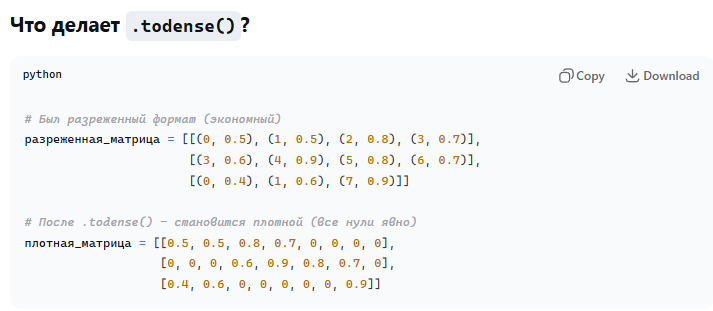

Причины для .todense():

Совместимость: Некоторые алгоритмы (как SVC в нашем примере) не работают с разреженными матрицами

Визуализация: Легче смотреть и понимать данные

Определенные операции: Некоторые математические операции проще с плотными матрицами

In [51]:
vector = vectors.todense()[0]
(vector != 0).sum()

np.int64(52)

In [52]:
vector.shape

(1, 1000)

In [53]:
np.mean(list(map(lambda x: (x != 0).sum(), vectors.todense())))

np.float64(89.78957718780728)

In [54]:
dense_vectors = vectors.todense()
dense_vectors.shape

(2034, 1000)

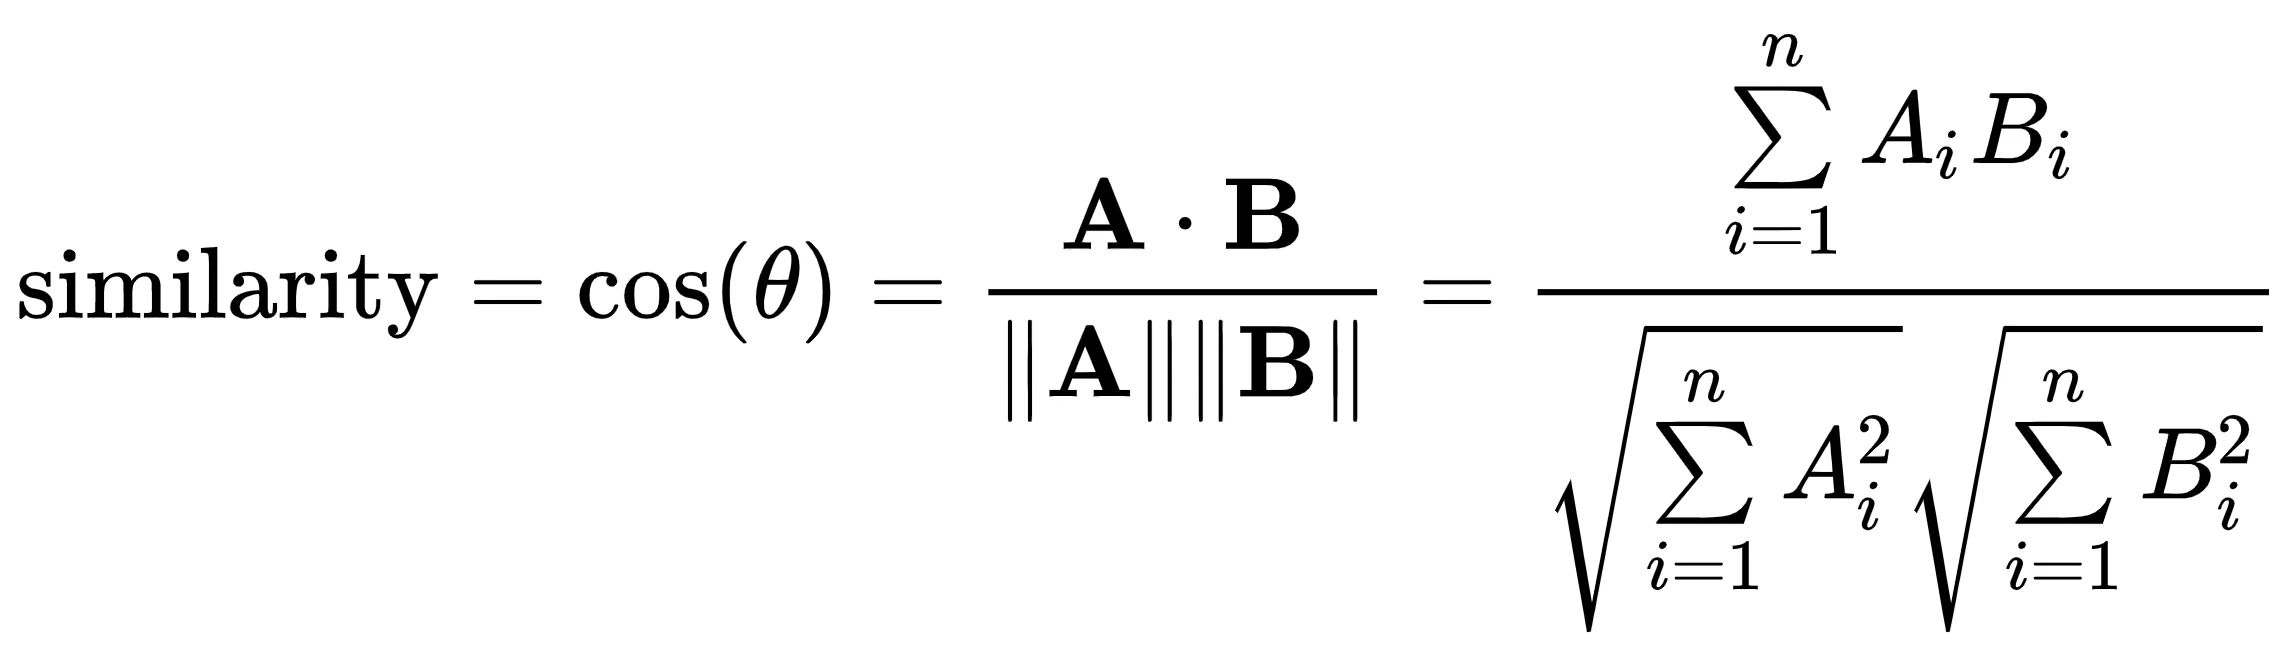

In [55]:
def cosine_sim(v1, v2):
    # v1, v2 (1 x dim)
    return np.array(v1 @ v2.T / norm(v1) / norm(v2))[0][0]

In [56]:
cosine_sim(dense_vectors[0], dense_vectors[0])

np.float64(1.0)

In [57]:
cosines = []
for i in range(10):
    cosines.append(cosine_sim(dense_vectors[0], dense_vectors[i]))

In [58]:
# [1, 3, 2, 0, 2, 0, 2, 1, 2, 1]
cosines

[np.float64(1.0),
 np.float64(0.04340216234273356),
 np.float64(0.005869320716370869),
 np.float64(0.0977681268180321),
 np.float64(0.0708529716676815),
 np.float64(0.0671119906644257),
 np.float64(0.02673898595765374),
 np.float64(0.22859045716453802),
 np.float64(0.03211995993493195),
 np.float64(0.06910217848560622)]

#### Обучим любую известную модель на полученных признаках

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test= train_test_split(dense_vectors, newsgroups_train.target, test_size=0.2, random_state=0)
y_train.shape, y_test.shape

((1627,), (407,))

In [60]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

In [ ]:
%%time
svc = svm.SVC()
svc.fit(X_train, y_train)

CPU times: user 2.19 s, sys: 13 ms, total: 2.2 s
Wall time: 2.29 s


SVC()

In [ ]:
accuracy_score(y_test, svc.predict(X_test))

0.918918918918919

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
accuracy_score(y_test, sgd.predict(X_test))

0.9066339066339066

### Embeddings

In [ ]:
!pip install Gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [61]:
# Загружаем предобученные эмбеддинги - векторы слов, обученные на огромных данных
import gensim.downloader as api
embeddings_pretrained = api.load('glove-twitter-25')

ModuleNotFoundError: No module named 'gensim'

In [62]:
from gensim.models import Word2Vec

proc_words = [preproc_nltk(text).split() for text in newsgroups_train.data]
embeddings_trained = Word2Vec(proc_words, # data for model to train on
                 vector_size=100,                 # embedding vector size
                 min_count=3,             # consider words that occured at least 5 times
                 window=3).wv

ModuleNotFoundError: No module named 'gensim'

In [ ]:
def vectorize_sum(comment, embeddings):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')

    for word in preproc_nltk(comment).split():
        if word in embeddings:
            features += embeddings[f'{word}']

    return features

In [ ]:
len(embeddings_trained.index_to_key)

13553

In [ ]:
X_wv = np.stack([vectorize_sum(text, embeddings_pretrained) for text in newsgroups_train.data])
X_train_wv, X_test_wv, y_train, y_test = train_test_split(X_wv, newsgroups_train.target, test_size=0.2, random_state=0)
X_train_wv.shape, X_test_wv.shape

((1627, 25), (407, 25))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(max_iter=5000)
wv_model = clf.fit(X_train_wv, y_train)
accuracy_score(y_test, wv_model.predict(X_test_wv))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6953316953316954

In [ ]:
X_wv = np.stack([vectorize_sum(text, embeddings_trained) for text in newsgroups_train.data])
X_train_wv, X_test_wv, y_train, y_test = train_test_split(X_wv, newsgroups_train.target, test_size=0.2, random_state=0)
X_train_wv.shape, X_test_wv.shape

((1627, 100), (407, 100))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(max_iter=10000)
wv_model = clf.fit(X_train_wv, y_train)
accuracy_score(y_test, wv_model.predict(X_test_wv))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8353808353808354

Библиотека genum не подключается, используем своб предобработку

In [63]:
# Вернемся к тому, что точно работало - TF-IDF и классификация
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Используем нашу предобработку
vectorizer = TfidfVectorizer(
    max_features=1000,
    preprocessor=preproc_nltk
)

print("Создаем TF-IDF векторы...")
vectors = vectorizer.fit_transform(newsgroups_train.data)

print("Размер матрицы:", vectors.shape)
print("Примеры фич:", vectorizer.get_feature_names_out()[100:110])

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    vectors, newsgroups_train.target, test_size=0.2, random_state=42
)

# Обучаем модель
print("Обучаем модель...")
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Оцениваем
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.3f}")

Создаем TF-IDF векторы...
Размер матрицы: (2034, 1000)
Примеры фич: ['argument' 'arizona' 'around' 'article' 'ask' 'asked' 'assume'
 'astronaut' 'astronomy' 'atheism']
Обучаем модель...
Точность модели: 0.924
